### Linear Regression - Car_Purchase
In this project I will be analysing the selling price of the cars.The data is from the car website CarDekho.com,which is available in kaggle, filled with information on a wide variety of cars, including their selling price and present price. 
In this case regression analysis will be used to predict selling price of cars based on dataset.




#### About the dataset
This dataset contains information about used cars listed on www.cardekho.com This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset is as follows:

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [267]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Looking at the above 5 rows of data we need to develop an understanding of every column to efficiently continue exploring the dataset further. We need to have a clear understanding of every feature defined in the data-set and what it is trying to convey!

In [268]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [269]:
df['Fuel_Type'].unique()
#df['Car_Name'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Above is a concise summary of our dataframe printing columns' data-type,index data-type and number of non-null values !

In [271]:
df.shape

(301, 9)

In [272]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Looking at the result of the above query it seems clear we have no missing/null values in our dataset!

In [273]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!

### Exploratory Data Analysis(EDA)
Let's create some simple plots to check out the data!

### Visualizing the categorical data :

#### 1. Owner Type
Let's examine the selling price based on the type of owner

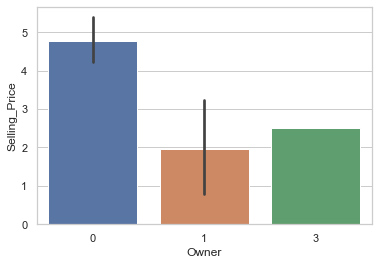

In [274]:
sns.barplot(x='Owner',y='Selling_Price',data=df)

It seems that the vehicles belonging to owner 0 have the highest selling price



#### 2. Transmission Type
Let's examine the selling price for manual and automatic vehicles!

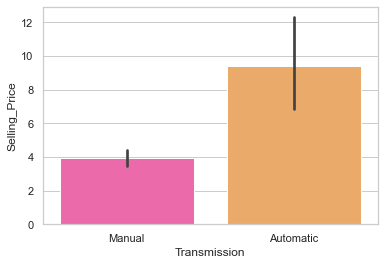

In [275]:
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='spring')

We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.

#### 3. Fuel Type
Let's examine the selling price based on different types of engine fuel!

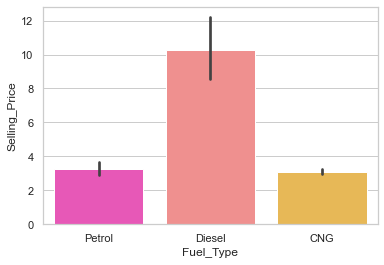

In [276]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='spring')

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

#### 4. Seller Type
Let's get an idea of the selling price for a vehicle sold by a Dealer vs Individual!

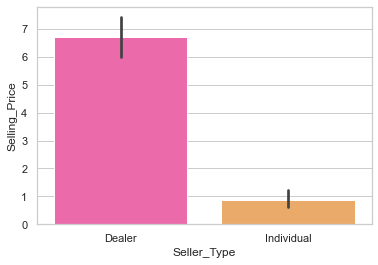

In [277]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='spring')

Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !

##### Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :

#### 1. Kms Driven

<Figure size 720x720 with 0 Axes>

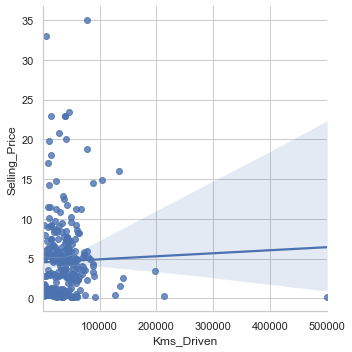

In [278]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=df)

The selling price is found to be higher for vehicles with less kms covered under the belt!

#### 2. Present Price

<Figure size 720x720 with 0 Axes>

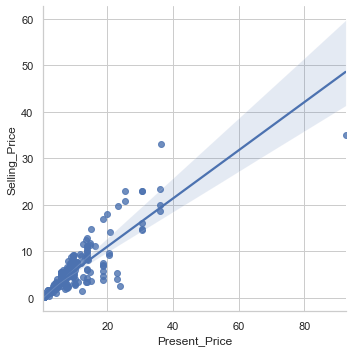

In [279]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

#### 3. Vehicle Age

In [280]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
df['Vehicle_Age']=2021- df['Year']

#check out the newly added column
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,3
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,6
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,6
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,5
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,6


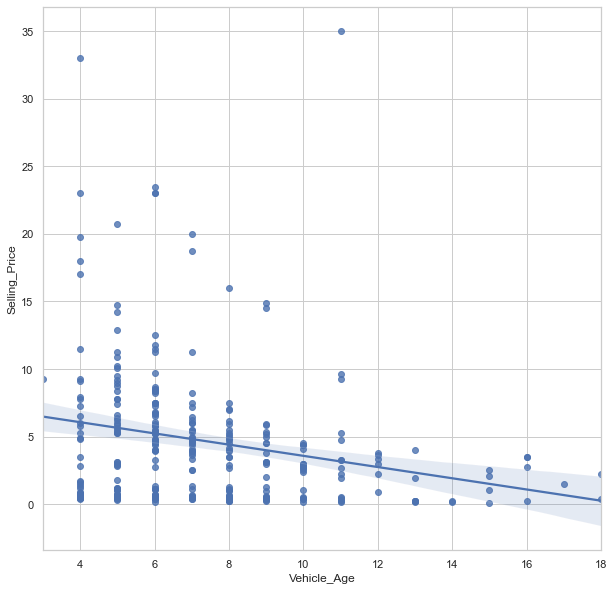

In [281]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=df)

It seems the selling price decreases overall for older/ageing vehicles!

### Feature Engineering
We shall convert categorical features to numeric type!

In [282]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
df=pd.get_dummies(df,columns=['Fuel_Type','Transmission','Seller_Type','Owner'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
df.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
0,ritz,3.35,5.59,27000,7,0,1,1,0,0,0
1,sx4,4.75,9.54,43000,8,1,0,1,0,0,0
2,ciaz,7.25,9.85,6900,4,0,1,1,0,0,0
3,wagon r,2.85,4.15,5200,10,0,1,1,0,0,0
4,swift,4.60,6.87,42450,7,1,0,1,0,0,0


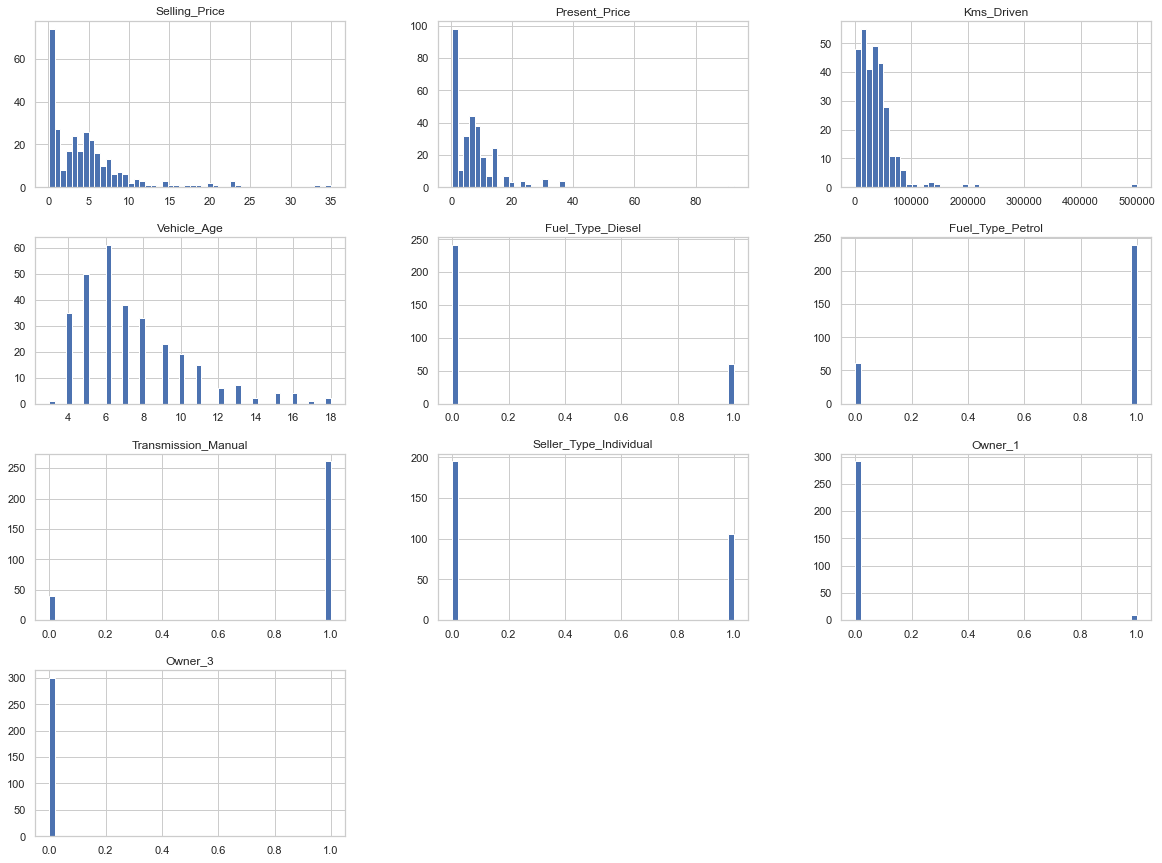

In [283]:
df.hist(bins=50, figsize=(20, 15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [284]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
Selling_Price,1.000000,0.878983,0.029187,-0.236141,0.552339,-0.540571,-0.367128,-0.550724,-0.098318,-0.024591
Present_Price,0.878983,1.000000,0.203647,0.047584,0.473306,-0.465244,-0.348715,-0.512030,-0.092636,0.107723
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.172515,-0.172874,-0.162510,-0.101419,-0.027279,0.156231
Vehicle_Age,-0.236141,0.047584,0.524342,1.000000,-0.064315,0.059959,-0.000394,0.039896,0.104538,0.152558
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,1.000000,-0.979648,-0.098643,-0.350467,-0.046094,-0.028808
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,-0.979648,1.000000,0.091013,0.358321,0.048579,0.029406
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.098643,0.091013,1.000000,0.063240,0.072571,-0.147479
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,-0.350467,0.358321,0.063240,1.000000,0.096188,0.078308
Owner_1,-0.098318,-0.092636,-0.027279,0.104538,-0.046094,0.048579,0.072571,0.096188,1.000000,-0.010703
Owner_3,-0.024591,0.107723,0.156231,0.152558,-0.028808,0.029406,-0.147479,0.078308,-0.010703,1.000000


#### Understanding and Visualizing Correlations amongst the features

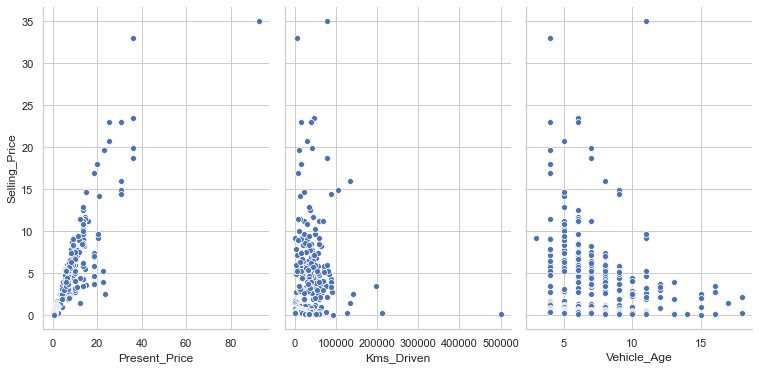

In [285]:
#sns.pairplot(df)
sns.pairplot(df, x_vars=['Present_Price','Kms_Driven','Vehicle_Age'], y_vars='Selling_Price', size=5, aspect=0.7)

The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.
Selling price seems to be considerably correlated with the Present Price feature.

By looking at the plots we can see that with the Selling_price variable the none of the independent variables form an accurately linear shape but present_price and Kms_Driven do still better than Vehicle_age which seems to hardly have any specific shape. So it violates the linearity assumption of linear regression and  shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

### Correlation HeatMap

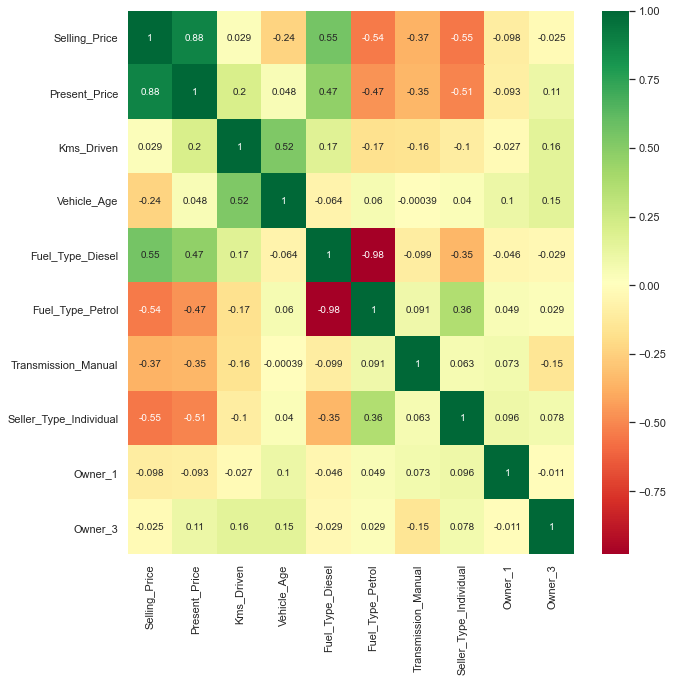

In [286]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(10,10))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Here we'regoing to find which variables have high correlation with selling price.Also we can see here different correlations between and among them.Present price is highly correlated with Selling price.Futher fuel type_Diesel has negative high correlation with Fuel_type_Petrol variable.These two dummy varaibles leads to problem known  as multicollinearity which is serious issue in meodels like Linear regression.

So,in order to overcome this problem,one of the dummy varaibles has to be dropped from the model.


In [287]:
sorted_Selling_Price = df.sort_values('Selling_Price', ascending=False)
sorted_Selling_Price.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
86,land cruiser,35.0,92.60,78000,11,1,0,1,0,0,0
64,fortuner,33.0,36.23,6000,4,1,0,0,0,0,0
63,fortuner,23.5,35.96,47000,6,1,0,0,0,0,0
82,innova,23.0,25.39,15000,4,1,0,0,0,0,0
51,fortuner,23.0,30.61,40000,6,1,0,0,0,0,0


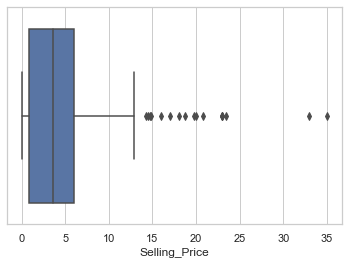

In [288]:
# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_Selling_Price.Selling_Price)

In [289]:
df = df.dropna()
df = df.drop(df[(df.Selling_Price>20)|(df.Selling_Price<0)].index)

In [290]:
sorted_Selling_Price = df.sort_values('Selling_Price', ascending=False)
sorted_Selling_Price.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
59,fortuner,19.99,35.96,41000,7,1,0,0,0,0,0
66,innova,19.75,23.15,11000,4,0,1,0,0,0,0
62,fortuner,18.75,35.96,78000,7,1,0,0,0,0,0
52,innova,18.00,19.77,15000,4,1,0,0,0,0,0
97,corolla altis,17.00,18.64,8700,4,0,1,1,0,0,0


In [291]:
df.shape

(294, 11)

In [292]:
df['log_Selling_Price'] = np.log(df.Selling_Price)

Text(0.5, 0, 'log_Selling_Price')

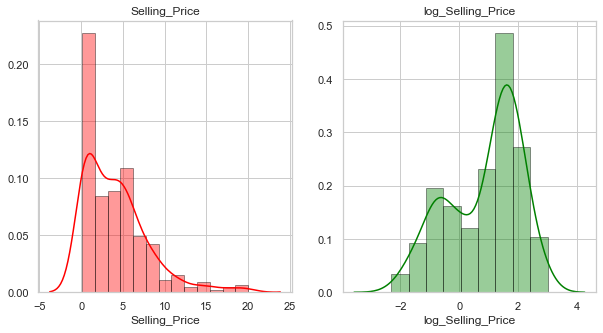

In [293]:
f, axes = plt.subplots(1, 2,figsize=(10,5))

sns.distplot(df.Selling_Price, hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Selling_Price")
axes[0].set_xlabel('Selling_Price')

sns.distplot(df.log_Selling_Price, hist=True, color = 'green',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("log_Selling_Price")
axes[1].set_xlabel('log_Selling_Price')

From these histograms ,we can see our data raw data is very skewed .In comaprison to log transformation of data ,skewness is lessen  and distributionis more or less symetrical. 

In [294]:
Y =df['log_Selling_Price']

In [295]:
X = df.drop(df.loc[:,['Car_Name','Selling_Price','log_Selling_Price','Fuel_Type_Petrol']],axis=1)

In [296]:
X.head()

,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
0,5.59,27000,7,0,1,0,0,0
1,9.54,43000,8,1,1,0,0,0
2,9.85,6900,4,0,1,0,0,0
3,4.15,5200,10,0,1,0,0,0
4,6.87,42450,7,1,1,0,0,0


In [297]:
Y.count()

294

In [298]:
X.count()

Present_Price             294
Kms_Driven                294
Vehicle_Age               294
Fuel_Type_Diesel          294
Transmission_Manual       294
Seller_Type_Individual    294
Owner_1                   294
Owner_3                   294
dtype: int64

### Spliting data to train, test

In [299]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 

In [300]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

235 59 235 59


In [301]:
#x_train.columns

In [302]:
x_train.head()

,Present_Price,Kms_Driven,Vehicle_Age,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,Owner_1,Owner_3
188,0.570,18000,8,0,1,1,0,0
216,4.430,12500,5,0,1,0,0,0
175,0.787,75000,10,0,1,1,0,0
6,8.120,18796,6,0,1,0,0,0
231,9.400,15001,4,0,1,0,0,0


In [303]:
#x_test.columns

In [304]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['Vehicle_Age', 'Present_Price', 'Kms_Driven']
x_train[columns_to_scale] = standardScaler.fit_transform(x_train[columns_to_scale])

In [305]:
#x_train.head()

In [306]:
x_test[columns_to_scale] = standardScaler.fit_transform(x_test[columns_to_scale])

In [307]:
#x_test.head()

In [308]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(x_train , y_train) 

LinearRegression()

### Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [309]:
# print the intercept of best-fit line
print(lin_model.intercept_)

1.0979248296898674


In [310]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=df.drop(columns=['Car_Name','Selling_Price','log_Selling_Price','Fuel_Type_Petrol'])

coeff_df = pd.DataFrame(lin_model.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price,0.554706
Kms_Driven,-0.046306
Vehicle_Age,-0.315817
Fuel_Type_Diesel,0.141312
Transmission_Manual,0.259342
Seller_Type_Individual,-1.437284
Owner_1,-0.251129
Owner_3,0.645200


Interpreting the coefficients:
For numerical features:

Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.554.
Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0460.
Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.3155.

### Predictions from our Model
Let's grab predictions off our test set and see how well it did!

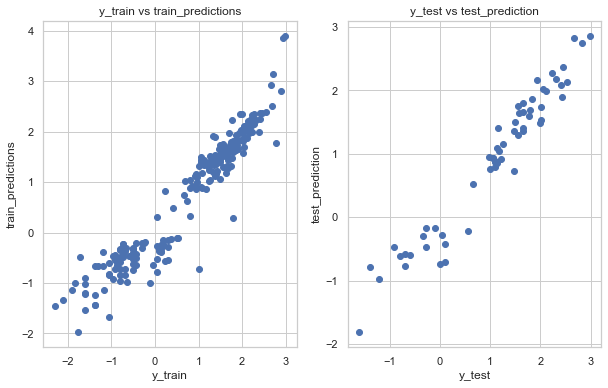

In [311]:
train_prediction=lin_model.predict(x_train)
test_prediction=lin_model.predict(x_test)
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

plt.title('y_train vs train_predictions')
plt.xlabel('y_train')
plt.ylabel('train_predictions')
plt.scatter(y_train,train_prediction)

plt.subplot(1,2,2)

plt.title('y_test vs test_prediction')
plt.xlabel('y_test')
plt.ylabel('test_prediction')
plt.scatter(y_test,test_prediction)

#### Residual Histogram

Text(0.5, 0.98, 'Residual Analysis')

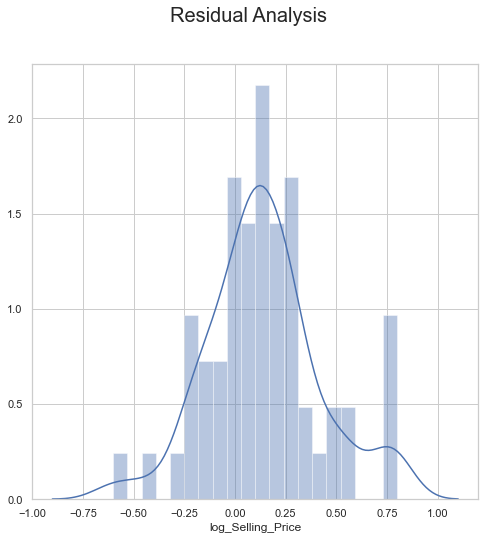

In [312]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-test_prediction),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

We can see errors are normally distrubuted.Also it satisfies the Assumption Normality of the error term in linear regression

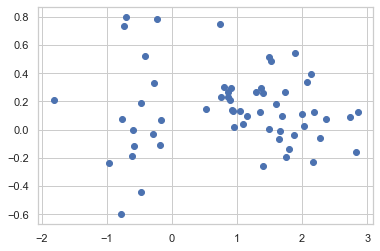

In [313]:
plt.scatter(test_prediction, y_test-test_prediction)

Cannot see same variance within error terms.This violate the homoscedasticity assumption of the Linear regression.

In [314]:
#plt.scatter(train_prediction, y_train-train_prediction)

###  Regression Evaluation Metrics

 MAE is the easiest to understand, because it's the average error.
 MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
 RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
 All of these are loss functions, because we want to minimize them.

In [315]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_prediction)))

MAE: 0.23582022075632159
MSE: 0.09626828034955792
RMSE: 0.3102713012019609


One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.In this case it is 0.310. The lower the RMSE, the better a given model is able to fit a dataset.

In [316]:
R2 = metrics.r2_score(y_test,test_prediction)
R2

0.9252849844237379

92% of variation in the response variable can be explained by predictor varaibles.

### Conclusions

1. Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
2. Resale value of Automatic vehicle is more than that of a Manual vehicle.
3. Car age is effecting negatively as the Selling Price decreases for an older car.
4. Resale value of cars with Fuel type Diesel is higher.

In [317]:
# save the file for deployment

import pickle
file = open('Linear model_car.pkl','wb')
pickle.dump(lin_model,file)